In [3]:
#auto reload
%load_ext autoreload
%autoreload 2

In [4]:
import warcraftlogs
from warcraftlogs.constants import TOKEN_DIR

In [5]:
from warcraftlogs import WarcraftLogsClient

client = WarcraftLogsClient(token_dir=TOKEN_DIR)

In [6]:
query = """
query GetGameZones {
    gameData {
    expansions {
        name
        zones {
        id
        name
        }
    }
    }
}
"""

result = client.query_public_api(query)

In [7]:
result

{'errors': [{'message': 'Cannot query field "expansions" on type "GameData". Did you mean "factions"?',
   'extensions': {'category': 'graphql'},
   'locations': [{'line': 4, 'column': 5}]}]}

In [8]:
def get_data(query: str, **kwargs) -> dict:
    """
    Helper function to get data from the WarcraftLogs API.
    """
    data = client.query_public_api(query, **kwargs)
    return data

In [51]:
query="""query($code:String){
reportData{
  report(code:$code){
    startTime
    endTime
    fights {
      id
      difficulty
      name
      kill
      startTime
      endTime
      fightPercentage
      dungeonPulls {
        endTime
        startTime
        enemyNPCs {
          id,
          gameID
        }
        name
    }
    }
    playerDetails(fightIDs:2)
    rankings
}
}}
"""

REPORT_ID =  "pB9X1RvTkc8LDCjz" #"ZXxKHCtpn9hz2aAb"
FIGHT_ID = 2
PLAYER_ID = 161

resp = client.query_public_api(query, {"code":REPORT_ID})

In [52]:
resp

{'data': {'reportData': {'report': {'startTime': 1743291988402,
    'endTime': 1743300930275,
    'fights': [{'id': 1,
      'difficulty': None,
      'name': 'Kirves',
      'kill': None,
      'startTime': 204738,
      'endTime': 204738,
      'fightPercentage': None,
      'dungeonPulls': None},
     {'id': 2,
      'difficulty': 10,
      'name': 'Operation: Mechagon',
      'kill': True,
      'startTime': 540236,
      'endTime': 2624261,
      'fightPercentage': 100,
      'dungeonPulls': [{'endTime': 653031,
        'startTime': 561965,
        'enemyNPCs': [{'id': 236, 'gameID': 151658},
         {'id': 237, 'gameID': 151659},
         {'id': 235, 'gameID': 151657}],
        'name': 'Strider Tonk'},
       {'endTime': 836309,
        'startTime': 671334,
        'enemyNPCs': [{'id': 251, 'gameID': 145185},
         {'id': 250, 'gameID': 144244}],
        'name': 'Tussle Tonks'},
       {'endTime': 909708,
        'startTime': 860723,
        'enemyNPCs': [{'id': 260, 'gameID'

In [25]:
import pandas as pd

pd.DataFrame(resp['data']['reportData']['report']['fights'])

,id,difficulty,name,kill,startTime,endTime,fightPercentage
0,1,NaN,Kirves,None,204738,204738,NaN
1,2,10.0,Operation: Mechagon,True,540236,2624261,100.0
2,3,NaN,Cleave Training Dummy,None,3518664,3601716,NaN
3,4,NaN,Dungeoneer's Training Dummy,None,3651249,3861382,NaN
4,5,NaN,Training Dummy,None,3872344,3874895,NaN
5,6,NaN,Kelpfist,None,3886786,3915346,NaN
6,7,NaN,Necrodrak,None,4035647,4036677,NaN
7,8,NaN,Cherryhole,None,4138010,4141507,NaN
8,9,NaN,Cherryhole,None,4152285,4152285,NaN
9,10,NaN,Eye of Topaz,None,4950178,4950278,NaN


In [ ]:
# try analyzing fight Id = 1 
# playerid ret is 12


In [26]:
resp['data']['reportData']['report']['playerDetails']['data']['playerDetails']['tanks']

[{'name': 'Shunwalker',
  'id': 161,
  'guid': 242917295,
  'type': 'Paladin',
  'server': 'Tichondrius',
  'region': 'US',
  'icon': 'Paladin-Protection',
  'specs': [{'spec': 'Protection', 'count': 1}],
  'minItemLevel': 659,
  'maxItemLevel': 659,
  'potionUse': 0,
  'healthstoneUse': 0,
  'combatantInfo': []}]

In [120]:
def get_cooldown_usage_query(report_code, fight_id, player_id):
    query = """
    {
      reportData {
        report(code: "%s") {
          graph(
            fightIDs: [%d]
            dataType: Casts
            sourceID: %d
          )
        }
      }
    }
    """ % (report_code, fight_id, player_id)
    
    return query


def get_damage_done_query(report_code, fight_id, player_id=None):
    # If player_id is provided, filter to that specific player
    source_filter = f"sourceID: {player_id}" if player_id is not None else ""
    
    query = """
    {
      reportData {
        report(code: "%s") {
          graph(
            fightIDs: [%d]
            dataType: DamageDone
            %s
          )
        }
      }
    }
    """ % (report_code, fight_id, source_filter)
    
    return query


def get_threat_query(report_code, fight_id, player_id=None):
    # If player_id is provided, filter to that specific player
    source_filter = f"sourceID: {player_id}" if player_id is not None else ""
    
    query = """
    {
      reportData {
        report(code: "%s") {
          events(
            fightIDs: [%d]
            dataType: Threat
            %s
          ) {
            data
            nextPageTimestamp
          }
        }
      }
    }
    """ % (report_code, fight_id, source_filter)
    
    return query


def find_npc_ids(report_code, fight_id):
    query = """
{
  reportData {
    report(code: "%s") {
      fights {
        enemyNPCs {
          id
          gameID
        }
      }
      masterData {
        actors {
          id
          name
          gameID
          type
          subType
        }
      }
    }
  }
}
""" % report_code
    return query

In [75]:
response = client.query_public_api(get_cooldown_usage_query(REPORT_ID, FIGHT_ID, PLAYER_ID))

In [117]:
dmg_events_resp = client.query_public_api(get_damage_done_query(REPORT_ID, FIGHT_ID, PLAYER_ID))


In [118]:
threat_resp = client.query_public_api(get_threat_query(REPORT_ID, FIGHT_ID, PLAYER_ID))

In [122]:
npc_resp = client.query_public_api(find_npc_ids(REPORT_ID, FIGHT_ID))

In [123]:
id_to_name_df = pd.DataFrame(npc_resp['data']['reportData']['report']['masterData']['actors'])

In [125]:
npc_resp['data']['reportData']['report']['masterData']['actors']

[{'id': -1,
  'name': 'Environment',
  'gameID': 0,
  'type': 'NPC',
  'subType': 'NPC'},
 {'id': 1,
  'name': 'Mersie',
  'gameID': 196424411,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 2,
  'name': 'Grundair',
  'gameID': 200966550,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 3,
  'name': 'Saturdaye',
  'gameID': 243231648,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 4,
  'name': 'Lourkendh',
  'gameID': 243457383,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 5,
  'name': 'Shoreon',
  'gameID': 244927452,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 6,
  'name': 'Healeded',
  'gameID': 244927451,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 7,
  'name': 'Knucklebean',
  'gameID': 243073112,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 8,
  'name': 'Whoisthatdog',
  'gameID': 244322014,
  'type': 'Player',
  'subType': 'Unknown'},
 {'id': 9,
  'name': 'Stormgeazer',
  'gameID': 200006513,
  'type': 'Player',
  'subType': 'Unk

In [126]:
id_to_name_dict = dict(zip(id_to_name_df['id'], id_to_name_df['name']))

In [ ]:
id_to_name_dict

In [174]:
thread_df = pd.DataFrame(threat_resp['data']['reportData']['report']['events']['data'])

In [180]:
# map sourceID and targetID to names using the id_to_name_dict, name should include <id>_<name> for clarity in case of duplicates
# thread_df['sourceName'] = thread_df['sourceID'].\
#     map(lambda x: f"{x}_{id_to_name_dict[x]}" if x in id_to_name_dict else f"{x}_Unknown" )

# thread_df['targetName'] = thread_df['targetID'].\
#     map(lambda x: f"{x}_{id_to_name_dict[x]}" if x in id_to_name_dict else f"{x}_Unknown" )
thread_df['sourceName'] = thread_df['sourceID'].apply(lambda x: id_to_name_dict.get(x, f"{x}_Unknown"))
thread_df['targetName'] = thread_df['targetID'].apply(lambda x: id_to_name_dict.get(x, f"{x}_Unknown"))

# prefix sourcename if sourceInstanceID is not null to indicate the source is an instance of an actor (e.g. a pet or a totem)
thread_df['sourceName'] = thread_df.apply(
    lambda row: f"{int(row['sourceInstance'])}_{row['sourceName']}" if pd.notna(row['sourceInstance']) and row['sourceInstance'] != 0 
    else row['sourceName'], axis=1
)

# normalize timestamp to seconds and start from 0 for easier plotting
thread_df['timestamp_seconds'] = (thread_df['timestamp'] - thread_df['timestamp'].min()) / 1000.0

In [181]:
thread_df[['timestamp_seconds', 'sourceID','sourceName','targetName',]]

,timestamp_seconds,sourceID,sourceName,targetName
0,0.000,235,1_Bomb Tonk,Shunwalker
1,1.709,237,1_Rocket Tonk,Shunwalker
2,2.122,237,3_Rocket Tonk,Shunwalker
3,2.122,237,4_Rocket Tonk,Shunwalker
4,2.203,236,2_Strider Tonk,Shunwalker
...,...,...,...,...
1407,2054.087,296,King Mechagon,Shunwalker
1408,2055.841,296,King Mechagon,Shunwalker
1409,2057.528,296,King Mechagon,Shunwalker
1410,2059.432,296,King Mechagon,Shunwalker


In [184]:
# increase max rows displayed for better visibility in Jupyter Notebook
pd.set_option('display.max_rows', 1000)  # Set to a higher number to display more rows

thread_df[['timestamp_seconds', 'sourceID','sourceName','targetName']].\
    query("timestamp_seconds < 110");


In [208]:
thread_df[['timestamp_seconds', 'sourceID','sourceName','targetName']].\
    query("timestamp_seconds < 110").shape

(277, 4)

In [ ]:
thread_df[['timestamp_seconds', 'sourceID','sourceName','targetName']].\
    query("timestamp_seconds < 110").drop_duplicates(subset=['sourceName','targetName'
    ])

,timestamp_seconds,sourceID,sourceName,targetName
0,0.000,235,1_Bomb Tonk,Shunwalker
1,1.709,237,1_Rocket Tonk,Shunwalker
2,2.122,237,3_Rocket Tonk,Shunwalker
3,2.122,237,4_Rocket Tonk,Shunwalker
4,2.203,236,2_Strider Tonk,Shunwalker
5,2.584,161,Shunwalker,Bomb Tonk
6,5.070,236,3_Strider Tonk,Shunwalker
8,5.677,236,5_Strider Tonk,Shunwalker
9,5.764,235,2_Bomb Tonk,Shunwalker
10,5.764,236,4_Strider Tonk,Shunwalker



Pull Clusters Statistics:
              start_time  end_time  events_count  unique_targets  duration
pull_cluster                                                              
0                   0.00      9.20            16              16      9.20
1                  52.45     63.66             6               6     11.21
2                 110.60    116.56             3               3      5.96
3                 299.14    309.20             8               8     10.06
4                 352.57    363.52             9               9     10.95
5                 406.38    406.38             1               1      0.00
6                 436.91    444.79            12              12      7.88
7                 470.58    477.14             3               3      6.56
8                 509.58    516.76             3               3      7.18
9                 531.83    533.35             2               2      1.52
10                568.57    568.57             1               1      0.0

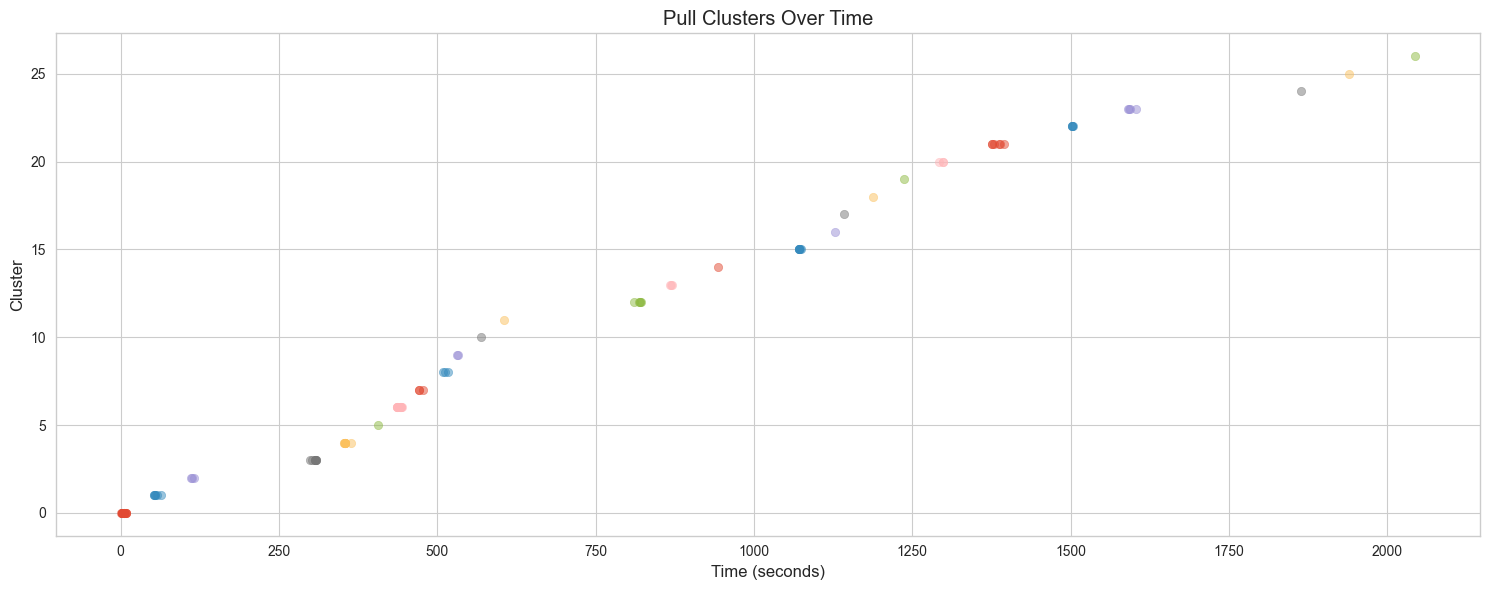

In [212]:
def identify_pull_clusters(df, gap_threshold=30):
    """
    Identifies pull clusters based on gaps in threat activity
    
    Parameters:
    - df: DataFrame with timestamp_seconds column
    - gap_threshold: Number of seconds that defines a gap between pulls (default 30s)
    
    Returns:
    - DataFrame with pull cluster assignments
    """
    # Sort by timestamp
    df = df.sort_values('timestamp_seconds')
    
    # Calculate time differences between consecutive events
    time_diffs = df['timestamp_seconds'].diff()
    
    # Identify new clusters where gap is larger than threshold
    new_cluster = time_diffs > gap_threshold
    
    # Create cluster labels
    cluster_labels = new_cluster.cumsum()
    
    # Add cluster labels to original dataframe
    df_with_clusters = df.copy()
    df_with_clusters['pull_cluster'] = cluster_labels
    
    # Calculate cluster statistics 
    cluster_stats = df_with_clusters.groupby('pull_cluster').agg({
        'timestamp_seconds': ['min', 'max', 'count'],
        'sourceName': lambda x: len(x.unique())
    }).round(2)
    
    cluster_stats.columns = ['start_time', 'end_time', 'events_count', 'unique_targets']
    cluster_stats['duration'] = cluster_stats['end_time'] - cluster_stats['start_time']
    
    return df_with_clusters, cluster_stats

# Example usage:
df_with_clusters, cluster_stats = identify_pull_clusters(thread_df.drop_duplicates(subset=['sourceName','targetName']), gap_threshold=10)

# Print cluster statistics
print("\nPull Clusters Statistics:")
print(cluster_stats)

# Visualize clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
for cluster in df_with_clusters['pull_cluster'].unique():
    cluster_data = df_with_clusters[df_with_clusters['pull_cluster'] == cluster]
    plt.scatter(cluster_data['timestamp_seconds'], 
               [cluster] * len(cluster_data), 
               alpha=0.5,
               label=f'Cluster {cluster}')

plt.title('Pull Clusters Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

In [219]:
# increase max columnd width
pd.set_option('display.max_colwidth', None)  # Set to None to display full content of columns

df_with_clusters.\
    groupby('pull_cluster').agg({
        'timestamp_seconds': ['min', 'max', 'count'],
        'sourceName': [lambda x: len(x.unique()), lambda x: x.unique()]
    }).round(2)

timestamp_seconds                sourceName  \
                           min      max count <lambda_0>   
pull_cluster                                               
0                         0.00     9.20    16         16   
1                        52.45    63.66     6          6   
2                       110.60   116.56     3          3   
3                       299.14   309.20     8          8   
4                       352.57   363.52     9          9   
5                       406.38   406.38     1          1   
6                       436.91   444.79    12         12   
7                       470.58   477.14     3          3   
8                       509.58   516.76     3          3   
9                       531.83   533.35     2          2   
10                      568.57   568.57     1          1   
11                      605.36   605.36     1          1   
12                      810.16   821.31     5          5   
13                      867.40   870.51     3          3   
14                      944.02   944.02     1          1   
15                     1070.99  1074.74     6          6   
16                     1127.31  1127.31     1          1   
17                     1141.51  1141.51     1          1   
18                     1187.65  1187.65     1          1   
19                     1236.49  1236.49     1          1   
20                     1292.02  1299.08     3          3   
21                     1375.86  1394.65     6          6   
22                     1502.42  1503.83     4          4   
23                     1590.45  1603.85     4          4   
24                     1863.55  1863.55     1          1   
25                     1938.80  1938.80     1          1   
26                     2044.16  2044.16     1          1   

                                                                                                                                                                                                                                                             
                                                                                                                                                                                                                                                 <lambda_1>  
pull_cluster                                                                                                                                                                                                                                                 
0             [1_Bomb Tonk, 1_Rocket Tonk, 3_Rocket Tonk, 4_Rocket Tonk, 2_Strider Tonk, Shunwalker, 3_Strider Tonk, 5_Strider Tonk, 2_Bomb Tonk, 4_Strider Tonk, 5_Rocket Tonk, 6_Rocket Tonk, 6_Strider Tonk, 1_Strider Tonk, 3_Bomb Tonk, 2_Rocket Tonk]  
1                                                                                                                                                                   [7_Strider Tonk, 4_Bomb Tonk, 9_Strider Tonk, 6_Bomb Tonk, 5_Bomb Tonk, 8_Strider Tonk]  
2                                                                                                                                                                                                        [The Platinum Pummeler, Gnomercy 4.U., Shunwalker]  
3                                                                                                                     [1_Waste Processing Unit, 1_Metal Gunk, 2_Metal Gunk, 2_Living Waste, 1_Living Waste, 5_Living Waste, 3_Living Waste, 4_Living Waste]  
4                                                                                                        [2_Waste Processing Unit, 3_Metal Gunk, Shunwalker, 10_Living Waste, 9_Living Waste, 8_Living Waste, 7_Living Waste, 6_Living Waste, 4_Metal Gunk]  
5                                                                                                                                                                                   

In [193]:
damage_events_flat = dmg_events_resp['data']['reportData']['report']['graph']['data']['series']

In [214]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter

def format_damage(x, pos):
    """Format damage values to be more readable"""
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

def analyze_damage_data(damage_data):
    # Extract time interval in seconds for x-axis
    interval_ms = damage_data[0]['pointInterval']
    interval_sec = interval_ms / 1000
    
    # Create a DataFrame for easier manipulation
    abilities_df = pd.DataFrame()
    
    # Process each ability
    for ability in damage_data:
        if ability.get('name') == 'Total':
            total_data = ability['data']
            continue
        
        abilities_df[ability['name']] = ability['data']
    
    # Calculate time for x-axis (in minutes)
    fight_length_min = len(total_data) * interval_sec / 60
    time_points = np.linspace(0, fight_length_min, len(total_data))
    
    # Create visualizations
    plt.style.use('ggplot')
    
    # 1. Line chart of top 5 abilities over time
    plt.figure(figsize=(14, 7))
    
    # Get top 5 abilities by total damage
    top_abilities = abilities_df.sum().sort_values(ascending=False).head(5).index
    
    for ability in top_abilities:
        plt.plot(time_points, abilities_df[ability], linewidth=2, label=ability)
    
    plt.title('Top 5 Abilities Damage Over Time', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Damage', fontsize=12)
    plt.legend(fontsize=10)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_damage))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 2. Stacked area chart showing distribution of all abilities
    plt.figure(figsize=(14, 7))
    
    plt.stackplot(time_points, [abilities_df[ability] for ability in abilities_df.columns], 
                  labels=abilities_df.columns, alpha=0.7)
    
    plt.title('Ability Damage Distribution Throughout Fight', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Damage', fontsize=12)
    plt.legend(loc='upper right', fontsize=8)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_damage))
    plt.tight_layout()
    plt.show()
    
    # 3. Pie chart of total damage contribution
    plt.figure(figsize=(10, 10))
    
    ability_totals = abilities_df.sum().sort_values(ascending=False)
    ability_totals_pct = ability_totals / ability_totals.sum() * 100
    
    # Only display top 8 abilities individually, group the rest
    if len(ability_totals) > 8:
        top_abilities = ability_totals.head(8)
        other_total = ability_totals.iloc[8:].sum()
        
        top_abilities_pct = top_abilities / ability_totals.sum() * 100
        other_pct = other_total / ability_totals.sum() * 100
        
        labels = list(top_abilities.index) + ['Other']
        sizes = list(top_abilities_pct) + [other_pct]
    else:
        labels = ability_totals.index
        sizes = ability_totals_pct
    
    # Create explode array to highlight highest damage ability
    explode = [0.1] + [0] * (len(labels) - 1)
    
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
            shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Ability Damage Contribution', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # 4. Heatmap showing damage patterns over time
    plt.figure(figsize=(14, 8))
    
    # Normalize each ability to show relative usage patterns
    normalized_df = abilities_df.copy()
    for ability in normalized_df.columns:
        max_val = normalized_df[ability].max()
        if max_val > 0:
            normalized_df[ability] = normalized_df[ability] / max_val
    
    # Sort abilities by when they peak
    peak_times = {col: normalized_df[col].idxmax() for col in normalized_df.columns}
    sorted_abilities = sorted(normalized_df.columns, key=lambda x: peak_times[x])
    
    sns.heatmap(normalized_df[sorted_abilities].T, cmap='inferno', 
                xticklabels=np.round(time_points[::2], 1), 
                yticklabels=sorted_abilities)
    
    plt.title('Ability Usage Patterns Throughout Fight', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Ability', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # 5. Burst analysis - identify periods of highest damage
    plt.figure(figsize=(14, 6))
    
    # Calculate total damage at each time point
    total_series = pd.Series(total_data)
    
    # Calculate a moving average to smooth the data
    window_size = 3
    rolling_avg = total_series.rolling(window=window_size, center=True).mean()
    
    plt.plot(time_points, total_data, color='gray', alpha=0.6, label='Raw Damage')
    plt.plot(time_points, rolling_avg, color='red', linewidth=2.5, label=f'{window_size}-Point Moving Average')
    
    # Find and highlight burst phases (top 3 peaks)
    peaks = rolling_avg.nlargest(3).index
    for peak in peaks:
        plt.axvline(x=time_points[peak], color='green', linestyle='--', alpha=0.7)
        plt.text(time_points[peak], rolling_avg[peak] * 1.05, 
                 f'Burst at {time_points[peak]:.1f} min', 
                 horizontalalignment='center')
    
    plt.title('Damage Output and Major Burst Phases', fontsize=16)
    plt.xlabel('Fight Time (minutes)', fontsize=12)
    plt.ylabel('Total Damage', fontsize=12)
    plt.legend(fontsize=10)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_damage))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Return key statistics
    top_abilities_stats = {}
    for ability in abilities_df.columns:
        ability_data = abilities_df[ability]
        top_abilities_stats[ability] = {
            'total_damage': ability_data.sum(),
            'max_damage': ability_data.max(),
            'avg_damage': ability_data.mean(),
            'damage_percentage': ability_data.sum() / abilities_df.sum().sum() * 100
        }
    
    return {
        'fight_length_min': fight_length_min,
        'ability_stats': top_abilities_stats,
        'peak_damage_time': time_points[total_series.idxmax()],
        'total_damage': total_series.sum()
    }

# Assuming damage_data is your list of dictionaries
# Example usage:
# stats = analyze_damage_data(damage_data)
# print(f"Fight length: {stats['fight_length_min']:.2f} minutes")
# print(f"Total damage: {stats['total_damage']:,}")
# print(f"Peak damage occurred at: {stats['peak_damage_time']:.2f} minutes")

In [215]:
from warcraftlogs.utils import parse_json_schema

In [38]:
damage_data_df = pd.DataFrame(damage_events_flat)

def format_damage_single(x):
    """Format damage values to be more readable"""
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'
    
damage_data_df['total_formatted'] = damage_data_df['total'].apply(format_damage_single)

In [39]:
damage_data_df['total'].sum()/(32+40/60)/60

877440.6734693878

In [40]:
damage_events_flat

[{'name': 'Consecration',
  'guid': 26573,
  'type': 2,
  'pointStart': 0,
  'pointInterval': 37257.80416666667,
  'total': 97300148,
  'data': [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   37038,
   43963.6,
   48342,
   55505.9,
   60741.9,
   63749.4,
   68117.7,
   68861,
   89584.7,
   95648,
   66364.8,
   63679.9,
   89043,
   85012.5,
   86546.8,
   85976.8,
   82955.4,
   84528.7,
   65711.3,
   60482.3,
   53041.3,
   48800.6,
   27372.1,
   28317.1,
   25009.6,
   26081.8,
   25468.3,
   23151.8,
   21245.5,
   36384,
   38219.7,
   40794.3,
   34093.1,
   31883,
   30247.7,
   30903.9,
   30449.7,
   38243.8,
   40402.2,
   26441.8,
   24292.3,
   21717.7,
   22424.6,
   28702,
   29962.7,
   33900.7,
   35288.7,
   29635,
   29325,
   27917.9,
   30376.1,
   32759.9,
   33990.8,
   28739.5,
   27872.7,
   20541.1,
   18873.9,
   16733.5,
   14885.1,
   14279.7,
   11821.5]},
 {'name': 'Blessed Hammer',
  'guid': 204019,
  'type': 2,
  'pointStart': 0,


In [41]:
damage_data_df.\
    sort_values('total', ascending=False).\
    drop(columns=['data', 'id'])

,name,guid,type,pointStart,pointInterval,total,total_formatted
12,Empyrean Hammer,431398.0,2,0,37257.804167,477108924.0,477.1M
3,Avenger's Shield,31935.0,6,0,37257.804167,255096507.0,255.1M
10,Hammer of Light,427453.0,2,0,37257.804167,204700838.0,204.7M
7,Judgment,275779.0,2,0,37257.804167,200593319.0,200.6M
5,Shield of the Righteous,53600.0,2,0,37257.804167,200404018.0,200.4M
0,Consecration,26573.0,2,0,37257.804167,97300148.0,97.3M
1,Blessed Hammer,204019.0,2,0,37257.804167,86359067.0,86.4M
9,Eye of Tyr,387174.0,2,0,37257.804167,71500466.0,71.5M
8,Suffocating Darkness,449217.0,32,0,37257.804167,42294198.0,42.3M
2,Melee,1.0,1,0,37257.804167,40889775.0,40.9M


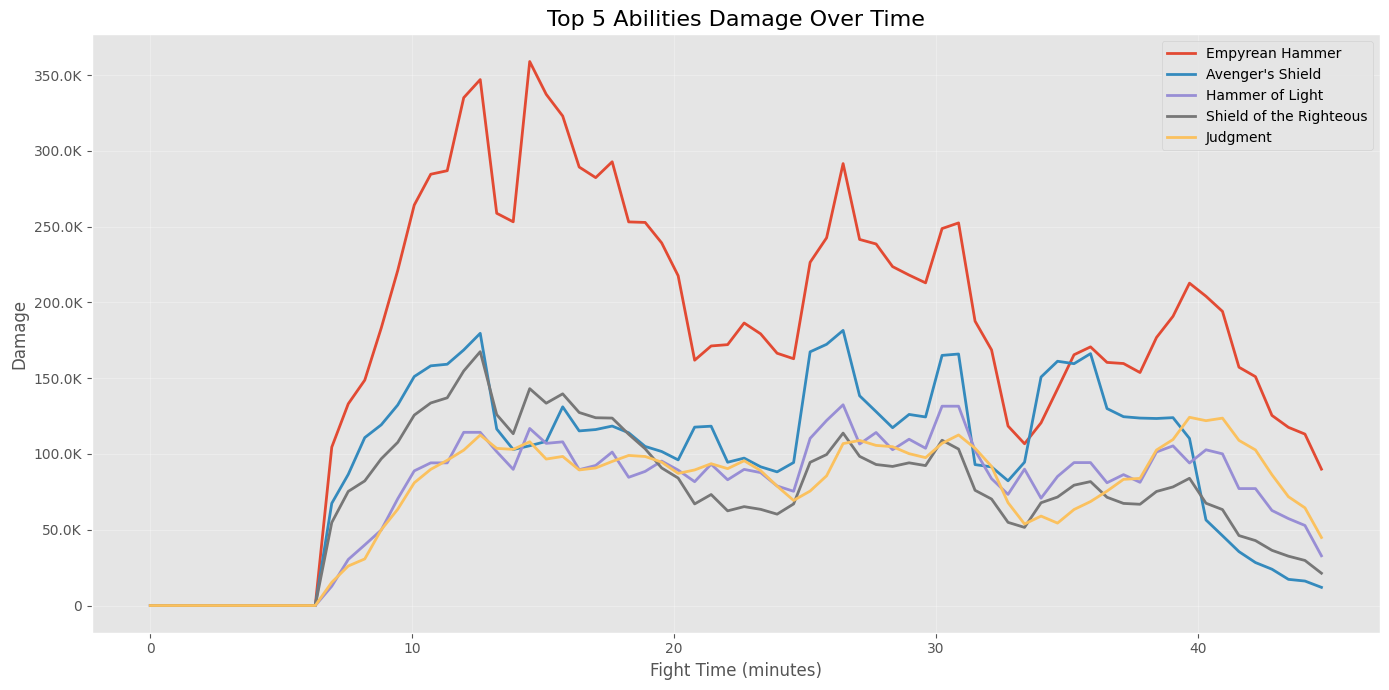

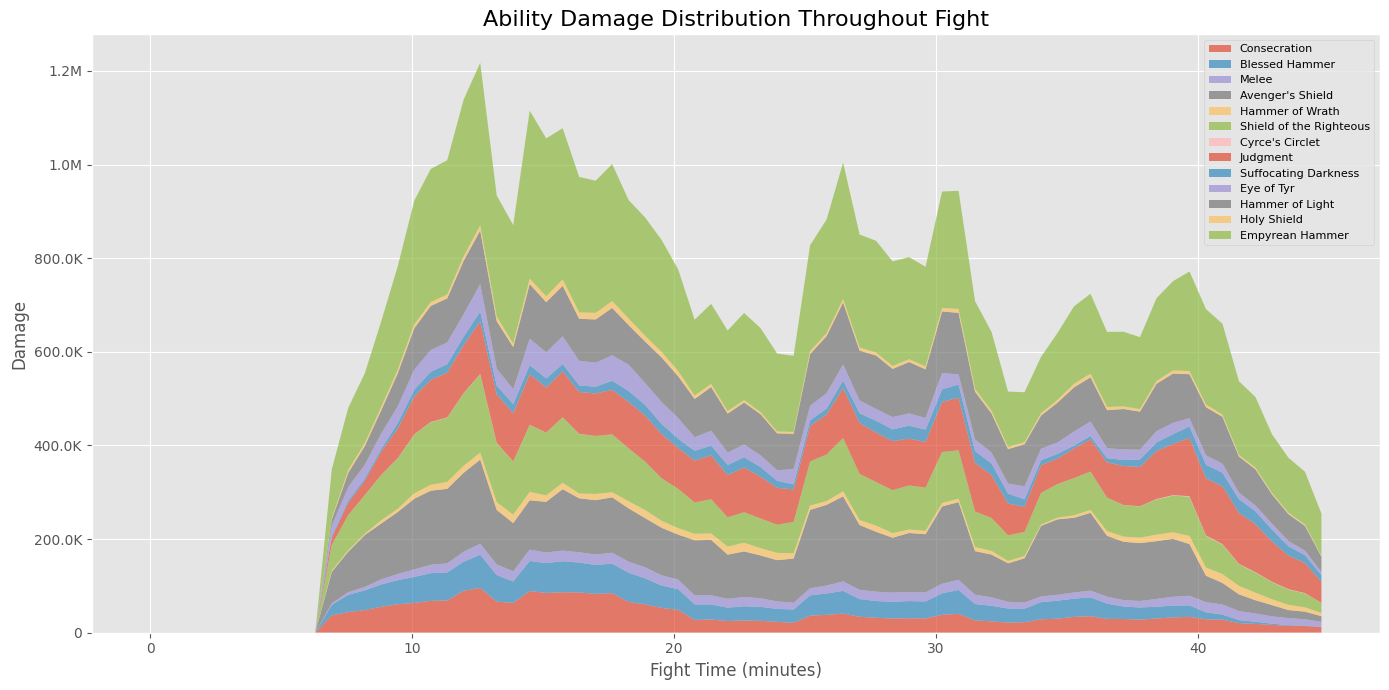

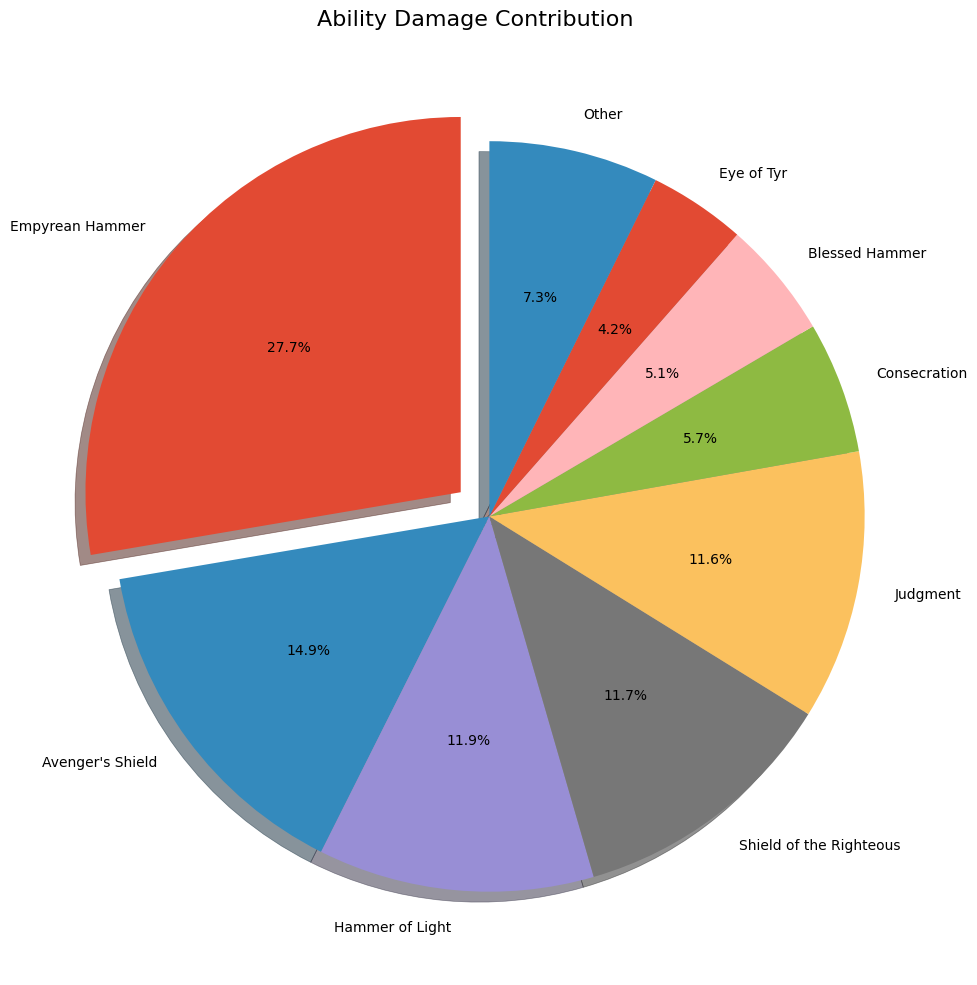

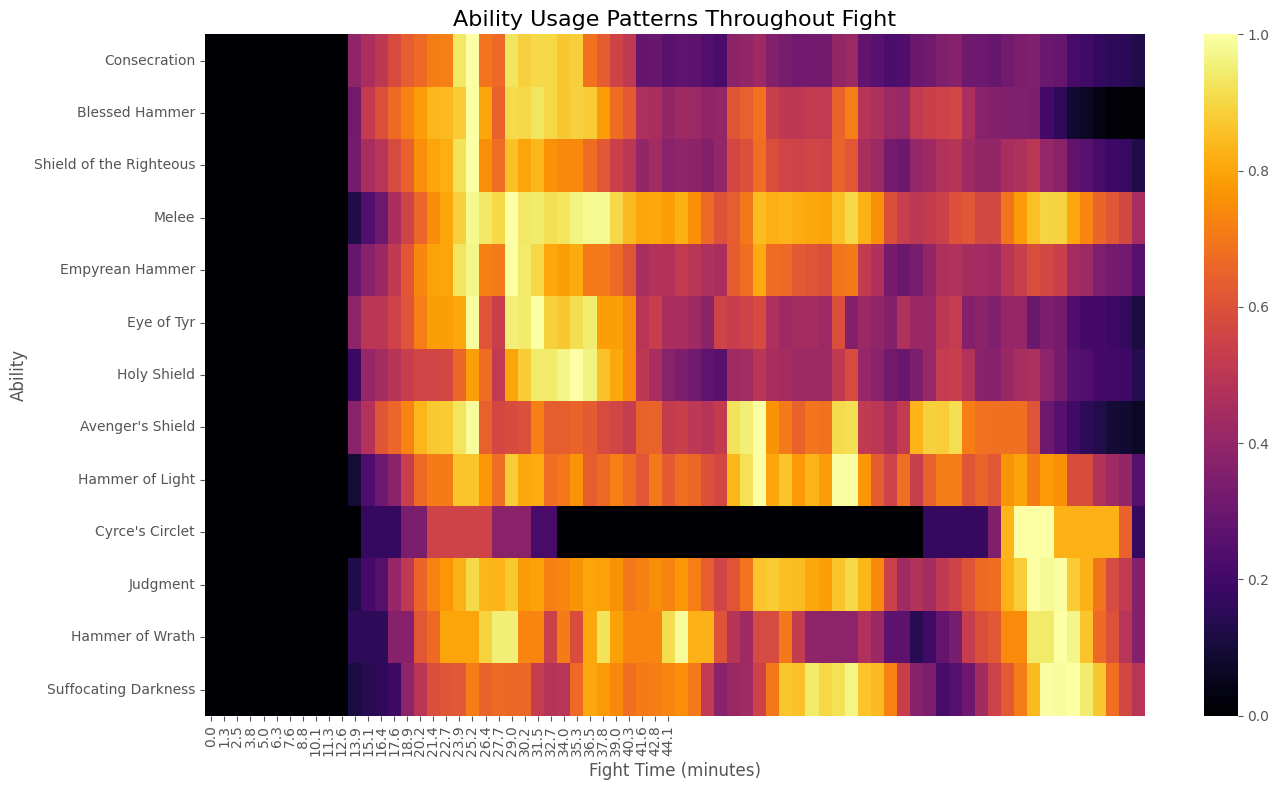

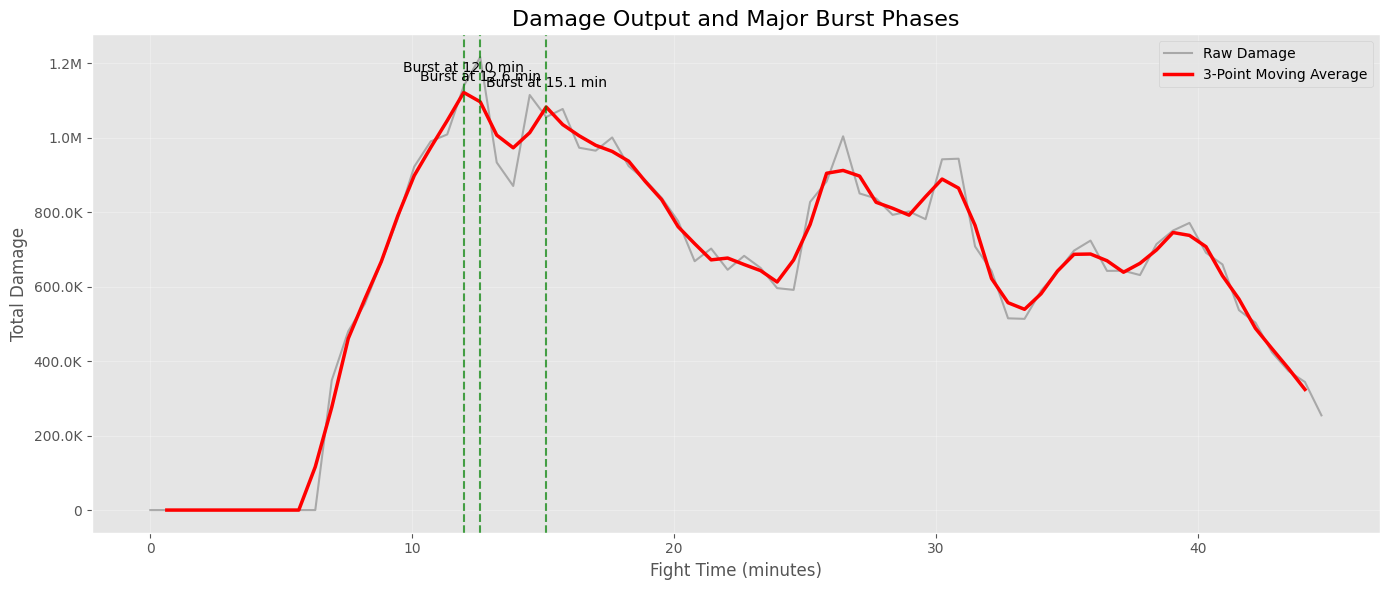

In [42]:
stats = analyze_damage_data(damage_events_flat)

In [124]:
def generate_player_fight_query(report_code, fight_id, player_id):
    """
    Generate a GraphQL query to get comprehensive information about a player during a specific fight.
    
    Args:
        report_code (str): The unique code for the WarcraftLogs report
        fight_id (int): The ID of the specific fight within the report
        player_id (int): The ID of the player to get information about
        
    Returns:
        tuple: (query_string, variables_dict) - The GraphQL query as a string and the variables dictionary
    """
    query = """
    query GetPlayerFightData($reportCode: String!, $fightID: Int!, $playerID: Int!) {
      report(code: $reportCode) {
        code
        title
        startTime
        
        # Get the specific fight data
        fights(fightIDs: [$fightID]) {
          id
          name
          difficulty
          startTime
          endTime
          kill
          encounterID
          size
          friendlyPlayers
          bossPercentage
          fightPercentage
          lastPhase
        }
        
        # Get player details including gear, talents, etc.
        playerDetails(
          fightIDs: [$fightID],
          includeCombatantInfo: true
        )
        
        # Get player combat data from the table view
        table(
          fightIDs: [$fightID],
          dataType: Summary,
          sourceID: $playerID
        )
        
        # Get damage done by the player
        table(
          fightIDs: [$fightID],
          dataType: DamageDone,
          sourceID: $playerID,
          viewBy: Ability
        )
        
        # Get healing done by the player
        table(
          fightIDs: [$fightID],
          dataType: Healing,
          sourceID: $playerID,
          viewBy: Ability
        )
        
        # Get damage taken by the player
        table(
          fightIDs: [$fightID],
          dataType: DamageTaken,
          targetID: $playerID,
          viewBy: Source
        )
        
        # Get casts by the player
        table(
          fightIDs: [$fightID],
          dataType: Casts,
          sourceID: $playerID
        )
        
        # Get buffs on the player
        table(
          fightIDs: [$fightID],
          dataType: Buffs,
          targetID: $playerID
        )
        
        # Get debuffs on the player
        table(
          fightIDs: [$fightID],
          dataType: Debuffs,
          targetID: $playerID
        )
        
        # Get player death events
        table(
          fightIDs: [$fightID],
          dataType: Deaths,
          sourceID: $playerID
        )
        
        # Get all events for the player (as source or target)
        events(
          fightIDs: [$fightID],
          sourceID: $playerID,
          limit: 10000
        )
        
        # Get talent information for the player (for Dragonflight+)
        fights(fightIDs: [$fightID]) {
          talentImportCode(actorID: $playerID)
        }
        
        # Get the master data which includes information about abilities and actors
        masterData {
          actors(type: "Player") {
            id
            name
            server
            type
            subType
            gameID
            icon
          }
          abilities {
            gameID
            name
            type
            icon
          }
        }
      }
    }
    """
    
    variables = {
        "reportCode": report_code,
        "fightID": fight_id,
        "playerID": player_id
    }
    
    return query, variables

# Example usage:
# query_string, variables = generate_player_fight_query("abcd1234", 12, 34)
# 
# # Use with a GraphQL client like gql
# from gql import Client, gql
# from gql.transport.requests import RequestsHTTPTransport
# 
# transport = RequestsHTTPTransport(
#     url='https://www.warcraftlogs.com/api/v2/client',
#     headers={'Authorization': f'Bearer YOUR_API_TOKEN'}
# )
# 
# client = Client(transport=transport)
# result = client.execute(gql(query_string), variable_values=variables)

In [125]:
query, variables = generate_player_fight_query(REPORT_ID, FIGHT_ID, PLAYER_ID)

In [128]:
resp = client.query_public_api(query, variables)

HTTPError: 500 Server Error: Internal Server Error for url: https://www.warcraftlogs.com/api/v2/client

In [137]:
def generate_prot_warrior_reports_query(start_time=None, end_time=None, limit=100):
    """
    Generate a GraphQL query to find reports with Protection Warriors.
    
    Args:
        start_time (int, optional): Unix timestamp for start date
        end_time (int, optional): Unix timestamp for end date
        limit (int, optional): Max number of reports to return
        
    Returns:
        tuple: (query_string, variables_dict)
    """
    query = """
    query GetProtWarriorReports($startTime: Float, $endTime: Float, $limit: Int!) {
      reportData {
        reports(startTime: $startTime, endTime: $endTime, limit: $limit) {
          data {
            code
            title
            startTime
            endTime
            zone {
              id
              name
            }
            masterData {
              actors(type: "Player", subType: "Warrior") {
                id
                name
                subType
              }
            }
          }
        }
      }
    }
    """
    
    variables = {
        "startTime": start_time,
        "endTime": end_time,
        "limit": limit
    }
    
    return query, variables

In [149]:
# 
start_time = "03/26/2025"
end_time = "03/27/2025"

start_time_epoch = int(pd.Timestamp(start_time).timestamp()*1000)
end_time_epoch = int(pd.Timestamp(end_time).timestamp()*1000)
print(start_time_epoch, end_time_epoch)

query, variables = generate_prot_warrior_reports_query(start_time_epoch, end_time_epoch, limit=10)

1742947200000 1743033600000


In [150]:
resp = client.query_public_api(query, variables)

In [151]:
resp

{'data': {'reportData': {'reports': {'data': [{'code': 'mY6dnTrRAbGLwk3t',
      'title': 'Mythic+ Season 2',
      'startTime': 1743006322155,
      'endTime': 1743200355389,
      'zone': {'id': 43, 'name': 'Mythic+ Season 2'},
      'masterData': {'actors': [{'id': 294,
         'name': 'Kuilqol',
         'subType': 'Warrior'},
        {'id': 296, 'name': 'Moggi', 'subType': 'Warrior'},
        {'id': 394, 'name': 'Malok', 'subType': 'Warrior'},
        {'id': 547, 'name': 'Bricep', 'subType': 'Warrior'},
        {'id': 889, 'name': 'Xingjian', 'subType': 'Warrior'},
        {'id': 1198, 'name': 'Michona', 'subType': 'Warrior'},
        {'id': 1216, 'name': 'Bigrignick', 'subType': 'Warrior'},
        {'id': 1450, 'name': 'Thakasw', 'subType': 'Warrior'},
        {'id': 1561, 'name': 'Tuskalott', 'subType': 'Warrior'},
        {'id': 1636, 'name': 'Maxcleavage', 'subType': 'Warrior'},
        {'id': 1644, 'name': 'Tilwar', 'subType': 'Warrior'},
        {'id': 1655, 'name': 'Pannin

In [ ]:
def generate_prot_warrior_reports_query(start_time=None, end_time=None, limit=100, min_key_level=10):
    """
    Generate a GraphQL query to find reports with Protection Warriors in Mythic+ dungeons.
    
    Args:
        start_time (int, optional): Unix timestamp for start date (milliseconds)
        end_time (int, optional): Unix timestamp for end date (milliseconds)
        limit (int, optional): Max number of reports to return
        min_key_level (int, optional): Minimum keystone level to include
        
    Returns:
        tuple: (query_string, variables_dict)
    """
    query = """
    query GetProtWarriorReports($startTime: Float, $endTime: Float, $limit: Int!, $zoneID: Int) {
      reportData {
        reports(startTime: $startTime, endTime: $endTime, limit: $limit, zoneID: $zoneID) {
          data {
            code
            title
            startTime
            endTime
            zone {
              id
              name
            }
            fights(difficulty: 10) {
              id
              name
              difficulty
              keystoneLevel
              kill
              friendlyPlayers
              startTime
              endTime
            }
            playerDetails(
              fightIDs: [$fightID],
              includeCombatantInfo: true
            )
            masterData {
              actors(type: "Player", subType: "Warrior") {
                id
                name
                subType
              }
            }
          }
          total
        }
      }
    }
    """
    
    variables = {
        "startTime": start_time,
        "endTime": end_time,
        "limit": limit,
        "zoneID": 43  # WoW Mythic+ Dungeons zone ID - you may need to update this based on current expansion
    }
    
    return query, variables

In [187]:
query, variables = generate_prot_warrior_reports_query(start_time_epoch, end_time_epoch, limit=10)

In [188]:
resp = client.query_public_api(query, variables)
resp

{'data': {'reportData': {'reports': {'data': [{'code': 'fh9pYnAjLJm4xVC6',
      'title': 'Mythic+ Season 2',
      'startTime': 1743022007056,
      'endTime': 1743202898845,
      'zone': {'id': 43, 'name': 'Mythic+ Season 2'},
      'fights': [{'id': 1,
        'name': 'Cinderbrew Meadery',
        'difficulty': 10,
        'keystoneLevel': 11,
        'kill': False,
        'friendlyPlayers': [10, 14, 62, 9, 60, 61, 8, 15],
        'startTime': 286585,
        'endTime': 2249494},
       {'id': 2,
        'name': 'Cinderbrew Meadery',
        'difficulty': 10,
        'keystoneLevel': 10,
        'kill': True,
        'friendlyPlayers': [62, 9, 60, 61, 63],
        'startTime': 2249562,
        'endTime': 4240303},
       {'id': 3,
        'name': 'Darkflame Cleft',
        'difficulty': 10,
        'keystoneLevel': 10,
        'kill': True,
        'friendlyPlayers': [9, 83, 82, 84, 81],
        'startTime': 4967006,
        'endTime': 6573829},
       {'id': 35,
        'name': '

In [1]:
query = """
query GetDungeonRankings($zoneID: Int!) {
  worldData {
    zone(id: $zoneID) {
      name
      encounters {
        id
        name
        characterRankings(
          className: "Warrior",
          specName: "Protection",
          bracket: 10,
          includeCombatantInfo: true,
          leaderboard:LogsOnly
        )
      }
    }
  }
}
"""

variables = {
    "zoneID": 43,  # Replace with the actual dungeon zone ID
    "metric": "dps",  # Can be "dps", "hps", "playerscore", etc.
    "className": "Warrior",  # Optional
    "specName": "Protection"          # Optional
}

In [2]:
resp = client.query_public_api(query, variables)

NameError: name 'client' is not defined

In [247]:
resp['data']['worldData']['zone']['encounters'][0]['characterRankings']['rankings'][0]

{'name': 'Andychron',
 'class': 'Warrior',
 'spec': 'Protection',
 'amount': -199999665,
 'hardModeLevel': 10,
 'duration': 1171127,
 'startTime': 1742978648972,
 'report': {'code': 'xLNaZjW81JdpGfyD',
  'fightID': 5,
  'startTime': 1742970222189},
 'guild': {'id': 296858, 'name': 'Competence Optional', 'faction': 1},
 'server': {'id': 350, 'name': 'Twisting Nether', 'region': 'EU'},
 'bracketData': 10,
 'faction': 0,
 'affixes': [9, 10, 160],
 'medal': 'gold',
 'score': 335,
 'leaderboard': 0,
 'talents': [{'talentID': 112110, 'points': 1},
  {'talentID': 112112, 'points': 1},
  {'talentID': 112116, 'points': 1},
  {'talentID': 112149, 'points': 1},
  {'talentID': 112150, 'points': 1},
  {'talentID': 112151, 'points': 1},
  {'talentID': 112152, 'points': 1},
  {'talentID': 112153, 'points': 1},
  {'talentID': 112155, 'points': 1},
  {'talentID': 112156, 'points': 1},
  {'talentID': 112157, 'points': 1},
  {'talentID': 112158, 'points': 1},
  {'talentID': 112159, 'points': 1},
  {'tale

In [ ]:
### fighto only query

